Bude zlobit "právní".

In [1]:
import os
import json
import pandas as pd
from src.gender import gender
from src.vycisti import vycisti
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())
with open(os.path.join("data_fixes", "nelide.json"), encoding="utf-8") as nelide:
    nelide = json.loads(nelide.read())
df = vycisti(df, opravy)

2023/05/24 12:27:53 z 4531 filmů odstraněno 125. Aktuální dataframe obsahuje 4406 filmů.


In [2]:
import re

In [3]:
herectvo = vycisti(pd.read_json(os.path.join("data", "herectvo.json")), opravy)

2023/05/24 12:27:56 z 86651 filmů odstraněno 1199. Aktuální dataframe obsahuje 85452 filmů.


In [4]:
herectvo

,Jméno,Bio,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Titul,Film,Rok,Úloha,Role,Alternativní jména,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk
0,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Vratné lahve,Vratné lahve (23639),2007,Hrají,důchodce v parku,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,55.0
1,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Nejistá sezóna,Nejistá sezóna (397550),1987,Hrají,kulisák Honza Melichar,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,35.0
2,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Vesničko má středisková,Vesničko má středisková (397480),1985,Hrají,bagrista Ferda,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,33.0
3,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Rozpuštěný a vypuštěný,Rozpuštěný a vypuštěný (397438),1984,Hrají,agent Ziegler,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,32.0
4,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika","Jára Cimrman, ležící, spící","Jára Cimrman, ležící, spící (397423)",1983,Hrají,krajánek,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86646,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Straka v hrsti,Straka v hrsti (397595),1987,Hrají,čeledín,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,39.0
86647,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Rekord,Rekord (397357),1982,Hrají,chlapec,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,34.0
86648,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Opera ve vinici,Opera ve vinici (397330),1981,Hrají,přítel Jiří,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,33.0
86649,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Kalamita,Kalamita (397340),1980,Hrají,milenec,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,32.0


In [5]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [6]:
df["Hlavní role"] = df["Hrají"].dropna().apply(lambda x: x[:3])
df["Vedlejší role"] = df["Hrají"].dropna().apply(lambda x: x[3:])
df = df.explode("Hrají")
df = df[df["Hrají"] != "neuvedeno"]

## Obecná data

In [7]:
len(herectvo["Jméno"].drop_duplicates().to_list())

11617

In [8]:
zijici = herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()]["Jméno"].drop_duplicates().to_list()

In [9]:
len(zijici)

2926

In [10]:
veskere_herectvo = df["Hrají"].drop_duplicates().to_list()

In [11]:
len(veskere_herectvo)

36933

In [12]:
obsazovanost = pd.Series(herectvo.groupby("Jméno")["Film"].nunique(), name="Obsazovanost")

In [13]:
obsazovanost.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.00
0.333     1.00
0.500     1.00
0.667     3.00
0.750     4.00
0.900    15.00
0.950    30.00
0.990    74.84
Name: Obsazovanost, dtype: float64

In [14]:
obsazovanost2 = pd.Series(df.groupby("Hrají")["Film"].nunique(), name="Obsazovanost 2")

In [15]:
obsazovanost2.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     1.0
0.750     2.0
0.900     4.0
0.950     9.0
0.990    41.0
Name: Obsazovanost 2, dtype: float64

In [16]:
q = obsazovanost2.quantile(0.95)
q

9.0

In [17]:
q2 = obsazovanost2.quantile(0.98)
q2

24.0

## Nejdelší a nejplodnější kariéry

In [18]:
hraji = df[["Film","Copyright","Hrají"]].explode("Hrají")

In [19]:
hraji = hraji.merge(persony, left_on="Hrají", right_on="Jméno", how="outer")

In [20]:
hraji = hraji[hraji["Osoba"] != "právni"]

In [21]:
hraji

,Film,Copyright,Hrají,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
0,Polední výstřel na Mariánských hradbách (401709),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cvičení s kužely Sokolů malostranských (401704),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cyklisté (401705),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Defilování vojska o Božím těle na Královských ...,1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hanácké banderium (401707),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137837,NaN,NaN,NaN,Alexandra Sasínová (9996),9996,,fyzická,None,None,None,None,None,None,None,None,None,None,NaN,NaN
137838,NaN,NaN,NaN,plutoon s. r. o. (99962),99962,None,právní,plutoon,None,None,None,None,None,None,None,None,None,NaN,NaN
137839,NaN,NaN,NaN,plutoon s. r. o. (99962),99962,None,právní,plutoon,None,None,None,None,None,None,None,None,None,NaN,NaN
137840,NaN,NaN,NaN,Čechomor (person),person,None,právní,None,None,None,None,None,None,None,None,None,None,NaN,NaN


In [22]:
hraji["Věk"] = hraji["Copyright"] - hraji["Rok narození"]

In [23]:
delka_kariery = pd.Series(hraji.groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Anna Burianová                106.0
Marie Novotná                  88.0
Jiří Klečka                    82.0
Karel Dvořák                   82.0
Jiřina Bohdalová (2878)        79.0
František Kovářík (126912)     77.0
Kühnův dětský sbor (22659)     76.0
Zdenka Procházková (42989)     75.0
Zita Kabátová (839)            73.0
Jára Kohout (4846)             73.0
Name: Délka kariéry, dtype: float64

In [24]:
delka_kariery = pd.Series(hraji[~(hraji["Rok úmrtí"] <= (hraji["Copyright"]) - 1)].groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Anna Burianová                106.0
Marie Novotná                  88.0
Karel Dvořák                   82.0
Jiří Klečka                    82.0
Jiřina Bohdalová (2878)        79.0
Kühnův dětský sbor (22659)     76.0
Zdenka Procházková (42989)     75.0
Černý                          73.0
Josef Karel                    73.0
Zita Kabátová (839)            73.0
Name: Délka kariéry, dtype: float64

In [25]:
hraji.groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan W. Speerger (55928)        276
Theodor Pištěk (37366)         251
Eman Fiala (64088)             211
Jaroslav Marvan (9550)         208
František Filipovský (4735)    181
Alois Dvorský (127491)         167
Oldřich Velen (12725)          166
Milka Balek-Brodská (28799)    163
Josef Kemr (4897)              161
Jaroslav Tomsa (2576)          152
Name: Film, dtype: int64

In [26]:
hraji.groupby(["Hrají","Copyright"])["Film"].nunique().nlargest()

Hrají                    Copyright
Jan W. Speerger (55928)  1937.0       20
Theodor Pištěk (37366)   1938.0       20
Jan W. Speerger (55928)  1938.0       19
Theodor Pištěk (37366)   1937.0       19
Jaroslav Marvan (9550)   1938.0       18
Name: Film, dtype: int64

In [27]:
vsechno_herectvo = df["Hrají"].drop_duplicates().to_list()

In [28]:
nejaktivnejsich500 = hraji.groupby("Hrají")["Film"].nunique().nlargest(500).index.to_list()

In [29]:
nejaktivnejsich500

['Jan W. Speerger (55928)',
 'Theodor Pištěk (37366)',
 'Eman Fiala (64088)',
 'Jaroslav Marvan (9550)',
 'František Filipovský (4735)',
 'Alois Dvorský (127491)',
 'Oldřich Velen (12725)',
 'Milka Balek-Brodská (28799)',
 'Josef Kemr (4897)',
 'Jaroslav Tomsa (2576)',
 'Václav Trégl (35224)',
 'Vladimír Hlavatý (34999)',
 'Josef Hlinomaz (26212)',
 'Karel Hovorka (76534)',
 'Vladimír Řepa (127334)',
 'Jiří Lír (4926)',
 'Vladimír Menšík (126036)',
 'F. X. Mlejnek (128287)',
 'Karel Augusta (5058)',
 'František Kreuzmann (75624)',
 'Vladimír Navrátil (12670)',
 'Lubomír Kostelka (841)',
 'Bohuš Záhorský (53346)',
 'Mirko Musil (33555)',
 'Ota Motyčka (81341)',
 'Jindřich Plachta (5829)',
 'Rudolf Hrušínský st. (4842)',
 'Josef Somr (1054)',
 'Vlastimil Brodský (833)',
 'Jan Kuželka (1445)',
 'Jiřina Bílá (3629)',
 'Miloš Kopecký (4959)',
 'Václav Kotva (2718)',
 'Zdeněk Srstka (7960)',
 'Ella Nollová (127319)',
 'Hermína Vojtová (127041)',
 'Jaroslav Vojta (77195)',
 'Karel Engel (1439

<AxesSubplot:xlabel='Copyright'>

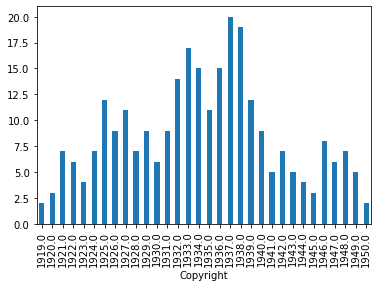

In [30]:
hraji[hraji["Hrají"] == "Jan W. Speerger (55928)"].groupby("Copyright")["Film"].nunique().plot.bar()

In [31]:
hraji[(~hraji["Datum narození"].isnull()) & hraji["Datum úmrtí"].isnull()].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan Kuželka (1445)            115
Jiří Lábus (838)              100
Jan Přeučil (4990)             93
Karel Hábl (27177)             92
Jan Kraus (1062)               84
Jiří Krampol (4985)            83
Oldřich Vlach (14387)          78
Jiřina Bohdalová (2878)        76
Jitka Zelenohorská (34821)     74
Ondřej Vetchý (836)            74
Name: Film, dtype: int64

In [32]:
hraji[hraji["Hrají"] == "Jiřina Bohdalová (2878)"][["Copyright","Film","Věk"]].sort_values(by="Copyright").head(10)

,Copyright,Film,Věk
23685,1937.0,Pižla a Žižla na cestách (395752),6.0
23686,1939.0,Zlatý člověk (395859),8.0
23687,1940.0,Babička (395928),9.0
23688,1940.0,Dceruška k pohledání (395926),9.0
23689,1940.0,Madla zpívá Evropě (395922),9.0
23690,1947.0,Muzikant (396045),16.0
23691,1952.0,Únos (396149),21.0
23692,1955.0,Direktiva (396228),24.0
23693,1955.0,Něco se tu změnilo (396202),24.0
23698,1956.0,Vina Vladimíra Olmera (396248),25.0


## Další rekordy

In [33]:
hraji[hraji["Věk"] <= 18].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Salač (126323)        21
Vladimír Bejval (15695)        17
Vladimír Zátka (128952)        16
Filip Renč (558)               15
Josef Kemr (4897)              14
Michael Hofbauer (13613)       14
Josef Filip (127149)           13
Zuzana Ondrouchová (126513)    13
Andrea Čunderlíková (14417)    12
Jan Kraus (1062)               12
Name: Film, dtype: int64

In [34]:
hraji[hraji["Věk"] <= 12].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Zátka (128952)    12
Jan Kreidl (128115)        10
Josef Filip (127149)       10
Tomáš Holý (27091)         10
Vladimír Bejval (15695)    10
Dagmar Appelová (28474)     9
Hanuš Bor (7070)            9
Lukáš Bech (23548)          9
Marta Fričová (127372)      9
Michal Koblic (128743)      9
Name: Film, dtype: int64

In [35]:
hraji[hraji["Věk"] >= 67].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Josef Střecha (55613)        68
Vlastimila Vlková (27109)    55
Alois Dvorský (127491)       47
Josef Oliak (128024)         40
Antonín Soukup (87404)       37
Marie Rosůlková (4751)       36
Vladimír Hlavatý (34999)     36
Josef Příhoda (128694)       35
Slávka Hamouzová (84688)     34
Bohdan Lachman (128508)      33
Name: Film, dtype: int64

In [36]:
hraji[hraji["Věk"] >= 80].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Josefa Pechlátová (126344)    15
Marie Rosůlková (4751)        12
František Kovářík (126912)    11
Antonín Soukup (87404)        10
Stanislav Zindulka (835)      10
Vlastimila Vlková (27109)     10
Jan Skopeček (8252)            9
Lubomír Lipský (9728)          9
Alois Dvorský (127491)         8
Antonín Zacpal (27111)         8
Name: Film, dtype: int64

## Kolegové

In [37]:
df["Spoluherectvo"] = df["Film"].map(df.groupby("Film")["Hrají"].agg(list))

In [38]:
def kolegove(jmeno):
    kolegove = df[df["Hrají"] == jmeno]["Spoluherectvo"].to_list()
    kolegove2 = [item for kolegove in kolegove for item in kolegove]
    kolegove = []
    for k in kolegove2:
        if k not in kolegove:
            kolegove.append(k)
    return(kolegove)

In [39]:
len(kolegove("Jiřina Bohdalová (2878)"))

1793

## Červí díry

In [40]:
prvni = hraji["Copyright"].min()
posledni = [hraji["Copyright"].max(), hraji["Copyright"].max()-1]

In [41]:
prvni_herectvo = hraji[hraji["Copyright"] == prvni]["Hrají"].drop_duplicates().to_list()
prvni_herectvo

[None,
 'Josef Šváb-Malostranský (55291)',
 'Ferdinand Gýra (60351)',
 'Marie Kříženecká (99776)']

In [42]:
posledni_herectvo = hraji[hraji["Copyright"].isin(posledni)]["Hrají"].drop_duplicates().to_list()
posledni_herectvo = [p for p in posledni_herectvo if p != "neuvedeno"]
posledni_herectvo

[None,
 'Marie Novotná',
 'Jan Kačer (1165)',
 'Iva Janžurová (1049)',
 'Pavel Nový (510)',
 'Zdeněk Dušek (993)',
 'Jiří Navrátil',
 'Jan Martínek',
 'Petr Štěpánek (5406)',
 'Miroslav Vladyka (513)',
 'Václav Černý',
 'Taťjana Medvecká (7064)',
 'Boleslav Polívka (1556)',
 'Luděk Sobota (15687)',
 'Roman Skamene (6363)',
 'Ivo Strangmüller (4401)',
 'Daniela Kolářová (1847)',
 'Marie Čápová',
 'Jiří Bartoška (827)',
 'Jan Kuželka (1445)',
 'Václav Vydra nejml. (2666)',
 'Josef Lébr',
 'Jiří Lábus (838)',
 'Alois Švehlík (6277)',
 'Zuzana Bydžovská (4683)',
 'Jiří Balvín',
 'Otakar Brousek ml. (2989)',
 'Jan Pospíšil',
 'Milan Šteindler (1572)',
 'František Ringo Čech (11726)',
 'Uršula Kluková (12475)',
 'Vlasta Žehrová (2776)',
 'Rostislav Novák st. (40328)',
 'Tomáš Jirsa',
 'Daniela Vacková (27460)',
 'Tomáš Hanák (198)',
 'Vlastimil Venclík (27245)',
 'Petr Drozda (1502)',
 'Miroslav Donutil (7954)',
 'Pavel Zatloukal (1580)',
 'Vladimír Hauser (12684)',
 'Martin Havelka (28167)'

In [43]:
cervi_diry = []
cervi_filmy = []
for n in vsechno_herectvo:
    if n:
        if "(" in n:
            spolu = kolegove(n)
            for x in prvni_herectvo:
                if x:
                    if "(" in x:
                        if x in spolu:
                            for y in posledni_herectvo:
                                if y:
                                    if "(" in y:
                                        if y in spolu:
                                            print(f"{n}, {x}, {y}")
                                            n_filmy = df[df["Hrají"] == n]["Film"].drop_duplicates().to_list()
                                            y_filmy = df[df["Hrají"] == y]["Film"].drop_duplicates().to_list()
                                            z_filmy = []
                                            for nf in n_filmy:
                                                if nf in y_filmy:
                                                    z_filmy.append(nf)
                                                    cervi_filmy.append(nf)
                                            print(z_filmy)
                                            print("***")
                                            cervi_diry.append(n)

Jarmila Kronbauerová (128121), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
Bedřich Vrbský (83528), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Jan Kačer (1165)
['Údolí včel (396722)', 'Velká neznámá (396861)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Pavel Nový (510)
['Kuřata na cestách (396497)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Petr Štěpánek (5406)
['Údolí včel (396722)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Taťjana Medvecká (7064)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Na samotě u lesa (397110)']
***
František Kovářík (126912), 

Jaroslav Marvan (9550), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
Jaroslav Marvan (9550), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Noc na Karlštejně (396999)']
***
Darja Hajská (35228), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Spadla s měsíce (396439)', 'Světáci (396816)', 'Ďábelské líbánky (396879)', 'Hodíme se k sobě, miláčku...? (397038)', '„Marečku, podejte mi pero!“ (397112)', 'Zítra to roztočíme, drahoušku...! (397104)', '„Já to tedy beru, šéfe...!“ (397161)']
***
Darja Hajská (35228), Josef Šváb-Malostranský (55291), Zdeněk Dušek (993)
['Jak se kalí ocel (396571)']
***
Darja Hajská (35228), Josef Šváb-Malostranský (55291), Petr Štěpánek (5406)
['Tři chlapi na cestách (396984)']
***
Darja Hajská (35228), Josef Šváb-Malostranský (55291), Miroslav Vladyka (513)
['Brácha za všechny peníze (397212)']
***
Darja Hajská (35228), Josef Šváb-Malostranský (55291), Taťjana Medvecká (7064)
['„Marečku, podejte

In [44]:
cervi_diry

['Jarmila Kronbauerová (128121)',
 'Bedřich Vrbský (83528)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'Eman Fiala (64088)',
 'Eman Fiala (64088)',
 'Eman Fiala (64088)',
 'Antonín Meisner (127732)',
 'L. H. Struna (126711)',
 'L. H. Struna (126711)',
 'L. H. Struna (126711)',
 'L. H. Struna (126711)',
 'Marta Májová (127723)',
 'Václav Vydra ml. (126535)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',


In [45]:
cervi_diry_seznam = list(set(cervi_diry))

In [46]:
len(cervi_diry_seznam)

25

In [47]:
cervi_diry_statistiky = {}
for c in cervi_diry:
    cervi_diry_statistiky[c] = cervi_diry.count(c)
cervi_diry_statistiky = pd.DataFrame.from_dict(cervi_diry_statistiky, orient="index").rename(columns={0: "propojení"})
cervi_diry_statistiky.sort_values(by="propojení",ascending=False).head(10)

,propojení
Vladimír Hlavatý (34999),27
Ela Šárková (126039),14
Darja Hajská (35228),12
František Kovářík (126912),10
Jára Kohout (4846),7
Ela Poznerová (126572),5
Gabriela Bártlová-Buddeusová (127814),4
L. H. Struna (126711),4
Eman Fiala (64088),3
Nataša Gollová (36491),3


In [49]:
cervi_filmy_statistiky = {}
for c in cervi_filmy:
    cervi_filmy_statistiky[c] = cervi_filmy.count(c)
cervi_filmy_statistiky = pd.DataFrame.from_dict(cervi_filmy_statistiky, orient="index").rename(columns={0: "propojení"})
cervi_filmy_statistiky.sort_values(by="propojení",ascending=False).head(10)

,propojení
Přátelé bermudského trojúhelníku (397557),10
Zelená vlna (397382),7
Velká filmová loupež (397520),7
"„Marečku, podejte mi pero!“ (397112)",6
Divoké pivo (8405),5
Čintamani & podvodník (396606),4
Hodinářova svatební cesta korálovým mořem (397250),4
Ďábelské líbánky (396879),4
Srdečný pozdrav ze zeměkoule (397365),4
Zralé víno (397335),4


In [ ]:
cervi_diry_ciste = []
for c in cervi_diry_seznam:
    c = c.split(" (")[0]
    cervi_diry_ciste.append(c)
print(", ".join(cervi_diry_ciste))

In [ ]:
hraji[hraji["Hrají"].isin(cervi_diry)].groupby("Copyright")["Rok úmrtí"].max().sort_values()

## Nejvíc oskarových filmů

In [ ]:
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())

In [ ]:
df[df["Film"].isin(seznamy["oskari"])].groupby("Hrají")["Film"].nunique().nlargest()

In [ ]:
df[df["Film"].isin(seznamy["oskarianominace"])].groupby("Hrají")["Film"].nunique().nlargest()

In [ ]:
df[(df["Film"].isin(seznamy["oskarianominace"]) & (df["Hrají"] == "Milada Ježková (79014)"))]

## Hlavní a vedlejší role

In [ ]:
hvezdnost = pd.Series(df.explode("Hlavní role").groupby("Hlavní role")["Film"].nunique() / df.explode("Hrají").groupby("Hrají")["Film"].nunique(), name="Hvězdnost")

In [ ]:
hvezdy = pd.DataFrame([hvezdnost, obsazovanost]).transpose()

In [ ]:
hvezdy

In [ ]:
hvezdy[hvezdy["Obsazovanost"] >= q].sort_values(by="Hvězdnost", ascending=False).head(50)

In [ ]:
nejvetsi_hvezdy_c_filmu = hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"] > 0.5)].sort_values(by="Hvězdnost", ascending=False).head(50).index.to_list()
super_hvezdy = []
for n in nejvetsi_hvezdy_c_filmu:
    n = n.split(" (")[0]
    super_hvezdy.append(n)
print(len(super_hvezdy))
print(", ".join(super_hvezdy))

In [ ]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy.index.isin(zijici))].sort_values(by=["Hvězdnost","Obsazovanost"], ascending=False).head(50)

In [ ]:
df = df[["Hrají","Hlavní role","Vedlejší role","Film","Žánr","Copyright"]].explode("Hlavní role").explode("Vedlejší role")

In [ ]:
df[df["Vedlejší role"] == "Vlasta Burian (11992)"]["Film"].drop_duplicates().to_list()

In [ ]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).head(10)

In [ ]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).shape

In [ ]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (~hvezdy["Hvězdnost"].isnull())].sort_values(by="Hvězdnost", ascending=True).head(10)

In [ ]:
df[df["Hlavní role"] == "Jaroslav Tomsa (2576)"]["Film"].drop_duplicates().to_list()

## Typologie herců

In [ ]:
df = df.explode("Žánr")

In [ ]:
df = df.replace("černá komedie","komedie").replace("bláznivá komedie","komedie").replace("hořká komedie","komedie").replace("smutná komedie","komedie")

In [ ]:
df = df.merge(obsazovanost, left_on="Hrají", right_on="Jméno")

In [ ]:
zanry = df["Žánr"].drop_duplicates().to_list()

In [ ]:
df.columns

In [ ]:
for z in zanry:
    print(f"""{z}: {df[df["Žánr"] == z].groupby("Hrají")["Film"].nunique().nlargest(1)}""")

In [ ]:
for z in zanry:
    typicke_herectvo = pd.Series(df[(df["Žánr"] == z) & (df["Obsazovanost"] >= q2)].groupby("Hrají")["Film"].nunique() / df.groupby("Hrají")["Obsazovanost"].max()).nlargest(10)
    print(z)
    print(typicke_herectvo)
    print("***")

In [ ]:
df.groupby("Hrají")["Žánr"].nunique().nlargest()

In [ ]:
df.groupby("Hlavní role")["Žánr"].nunique().nlargest()